In [585]:
#IMPORTS
import numpy as np
import pandas as pd
import scipy
import sklearn as sk
from math import sqrt
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import KFold
import random
import pprint
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report

In [671]:
#ESTIMATORS
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVR
from sklearn import svm
from sklearn.svm import SVC
from sklearn import linear_model
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.model_selection import RandomizedSearchCV


#MODEL METRICS
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

#CROSS VALIDATION
from sklearn.model_selection import train_test_split

#LIN REG
from sklearn.linear_model import LinearRegression


from pickle import dump
from pickle import load


In [522]:
#data
rawData = pd.read_csv("F:/School/Course 5/Task 3/default of credit card clients.csv", header=1)
rawData.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [523]:
rawData.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [524]:
rawData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          30000 non-null  int64
 1   LIMIT_BAL                   30000 non-null  int64
 2   SEX                         30000 non-null  int64
 3   EDUCATION                   30000 non-null  int64
 4   MARRIAGE                    30000 non-null  int64
 5   AGE                         30000 non-null  int64
 6   PAY_1                       30000 non-null  int64
 7   PAY_2                       30000 non-null  int64
 8   PAY_3                       30000 non-null  int64
 9   PAY_4                       30000 non-null  int64
 10  PAY_5                       30000 non-null  int64
 11  PAY_6                       30000 non-null  int64
 12  BILL_AMT1                   30000 non-null  int64
 13  BILL_AMT2                   30000 non-null  int64
 14  BILL_A

In [525]:
rawDataDF = pd.DataFrame(rawData)

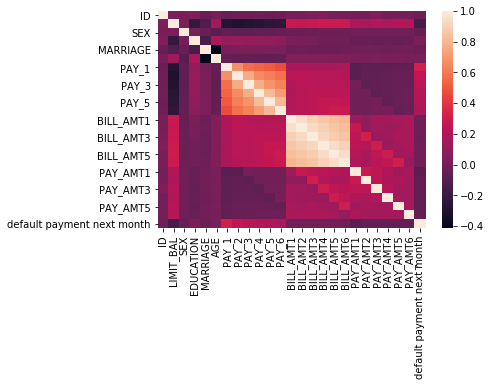

In [526]:
sns.heatmap(rawDataDF.corr())

In [527]:
del rawDataDF['ID']
OHE = rawDataDF.copy(deep=True)

In [528]:
OHE['SEX'] = pd.Categorical(OHE['SEX'])
OHE['EDUCATION'] = pd.Categorical(OHE['EDUCATION'])
OHE['MARRIAGE'] = pd.Categorical(OHE['MARRIAGE'])
OHE['PAY_1'] = pd.Categorical(OHE['PAY_1'])
OHE['PAY_2'] = pd.Categorical(OHE['PAY_2'])
OHE['PAY_3'] = pd.Categorical(OHE['PAY_3'])
OHE['PAY_4'] = pd.Categorical(OHE['PAY_4'])
OHE['PAY_5'] = pd.Categorical(OHE['PAY_5'])
OHE['PAY_6'] = pd.Categorical(OHE['PAY_6'])
OHE['default payment next month'] = pd.Categorical(OHE['default payment next month'])
OHE.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   LIMIT_BAL                   30000 non-null  int64   
 1   SEX                         30000 non-null  category
 2   EDUCATION                   30000 non-null  category
 3   MARRIAGE                    30000 non-null  category
 4   AGE                         30000 non-null  int64   
 5   PAY_1                       30000 non-null  category
 6   PAY_2                       30000 non-null  category
 7   PAY_3                       30000 non-null  category
 8   PAY_4                       30000 non-null  category
 9   PAY_5                       30000 non-null  category
 10  PAY_6                       30000 non-null  category
 11  BILL_AMT1                   30000 non-null  int64   
 12  BILL_AMT2                   30000 non-null  int64   
 13  BILL_AMT3       

In [604]:
#dependent variable
depVar = OHE['default payment next month']
features = OHE.iloc[:,0:23]
features.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [605]:
#Training Set (Feature Space: X Training)
X_train = (features[: 21000])
X_train.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,2,2,1,24,2,2,-1,-1,-2,...,689,0,0,0,0,689,0,0,0,0
1,120000,2,2,2,26,-1,2,0,0,0,...,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,2,2,2,34,0,0,0,0,0,...,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,2,2,1,37,0,0,0,0,0,...,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,1,2,1,57,-1,0,-1,0,0,...,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [597]:
#Dependent Variable Training Set (y Training)
y_train = depVar[: 21000]
y_train_count = len(y_train.index)
print('The number of observations in the Y training set are:',str(y_train_count))
y_train.head()

The number of observations in the Y training set are: 21000


0    1
1    1
2    0
3    0
4    0
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

In [623]:
validation_size = 0.3
seed= 9001
X_train, X_test, y_train, y_test = train_test_split(features, depVar,
test_size=validation_size, random_state=seed)

In [624]:
#Ground Truth (y_test) 
y_test = depVar[-9000:]
y_test_count = len(y_test.index)
print('The number of observations in the Y testing set are:',str(y_test_count))
y_test.head()

The number of observations in the Y testing set are: 9000


21000    0
21001    1
21002    0
21003    1
21004    1
Name: default payment next month, dtype: category
Categories (2, int64): [0, 1]

In [625]:
X_test.shape, y_test.shape

((9000, 23), (9000,))

In [620]:
#Models
models = []
models.append(('modelLR',LogisticRegression(solver='liblinear')))
models.append(('modelSVM', SVC(gamma='auto')))
models.append(('modelRF', RandomForestClassifier(n_estimators = 100, max_depth=2, random_state=0)))


In [539]:
folds = 10
seed= 9001
scoring = 'accuracy'

In [540]:
print(depVar)

0        1
1        1
2        0
3        0
4        0
        ..
29995    0
29996    0
29997    1
29998    1
29999    1
Name: default payment next month, Length: 30000, dtype: category
Categories (2, int64): [0, 1]


In [541]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

modelLR: 0.779048 (0.008143)
modelSVM: 0.779952 (0.007506)
modelRF: 0.800429 (0.007872)


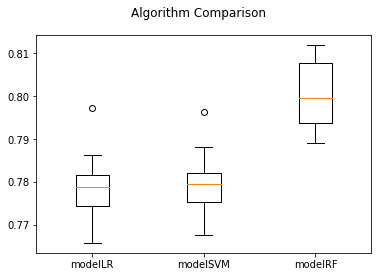

In [542]:
# Visualize distribution of accuracy values calculated across cross-validation folds using box and whisker plots
base_fig = plt.figure()
base_fig.suptitle('Algorithm Comparison')
base_ax = base_fig.add_subplot(111)
plt.boxplot(results)
base_ax.set_xticklabels(names)
plt.show()

In [543]:
#NZV dataset

In [544]:
X = OHE.iloc[:,0:23]
Y= OHE.iloc[:,-1]
X.head()
VarThres = VarianceThreshold(threshold=0.85)
VarThres.fit(X)
print(X.shape)

(30000, 23)


In [545]:
VarThresCol = [column for column in X.columns
              if column in X.columns[VarThres.get_support()]]

In [546]:
X_NZV = VarThres.transform(X)
print(X_NZV.shape)

(30000, 20)


In [547]:
NZVData = pd.DataFrame(data=X_NZV, columns = VarThresCol)
NZVData.head()


,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,689,0,0,0,0,689,0,0,0,0
1,120000,26,-1,2,0,0,0,2,2682,1725,2682,3272,3455,3261,0,1000,1000,1000,0,2000
2,90000,34,0,0,0,0,0,0,29239,14027,13559,14331,14948,15549,1518,1500,1000,1000,1000,5000
3,50000,37,0,0,0,0,0,0,46990,48233,49291,28314,28959,29547,2000,2019,1200,1100,1069,1000
4,50000,57,-1,0,-1,0,0,0,8617,5670,35835,20940,19146,19131,2000,36681,10000,9000,689,679


In [548]:
OHE_NZV = pd.concat([NZVData, OHE['default payment next month']], axis=1)
OHE_NZV.head()

,LIMIT_BAL,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
0,20000,24,2,2,-1,-1,-2,-2,3913,3102,...,0,0,0,0,689,0,0,0,0,1
1,120000,26,-1,2,0,0,0,2,2682,1725,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,90000,34,0,0,0,0,0,0,29239,14027,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,50000,37,0,0,0,0,0,0,46990,48233,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,50000,57,-1,0,-1,0,0,0,8617,5670,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [621]:
XNZV = OHE_NZV.iloc[:,0:20]
YNZV = OHE_NZV.iloc[:,-1]
XNZV.head()
XNZV.describe

<bound method NDFrame.describe of       LIMIT_BAL AGE PAY_1 PAY_2 PAY_3 PAY_4 PAY_5 PAY_6 BILL_AMT1 BILL_AMT2  \
0         20000  24     2     2    -1    -1    -2    -2      3913      3102   
1        120000  26    -1     2     0     0     0     2      2682      1725   
2         90000  34     0     0     0     0     0     0     29239     14027   
3         50000  37     0     0     0     0     0     0     46990     48233   
4         50000  57    -1     0    -1     0     0     0      8617      5670   
...         ...  ..   ...   ...   ...   ...   ...   ...       ...       ...   
29995    220000  39     0     0     0     0     0     0    188948    192815   
29996    150000  43    -1    -1    -1    -1     0     0      1683      1828   
29997     30000  37     4     3     2    -1     0     0      3565      3356   
29998     80000  41     1    -1     0     0     0    -1     -1645     78379   
29999     50000  46     0     0     0     0     0     0     47929     48905   

      BILL_AMT3 B

In [622]:
validation_size = 0.3
seed= 9001
X_trainNZV, X_testNZV, y_trainNZV, y_testNZV = train_test_split(XNZV, YNZV,
test_size=validation_size, random_state=seed)
X_testNZV.shape, y_testNZV.shape

((9000, 20), (9000,))

In [551]:
folds = 10
seed= 9001
scoring = 'accuracy'

In [552]:
#NZV Models
modelsNZV = []
modelsNZV.append(('modelLR',LogisticRegression(solver='liblinear')))
modelsNZV.append(('modelSVM', SVC(gamma='auto')))
modelsNZV.append(('modelRF', RandomForestClassifier(n_estimators = 100, max_depth=2, random_state=0)))


In [553]:
resultsNZV = []
namesNZV = []
for name, model in modelsNZV:
    kfold = KFold(n_splits=folds, random_state=seed, shuffle=True)
    cv_resultsNZV = cross_val_score(model, XNZV, YNZV, cv=kfold, scoring=scoring)
    resultsNZV.append(cv_resultsNZV)
    namesNZV.append(name)
    msg = "%s: %f (%f)" % (name, cv_resultsNZV.mean(), cv_resultsNZV.std())
    print(msg)

modelLR: 0.778733 (0.010143)
modelSVM: 0.779667 (0.010290)
modelRF: 0.807033 (0.008089)


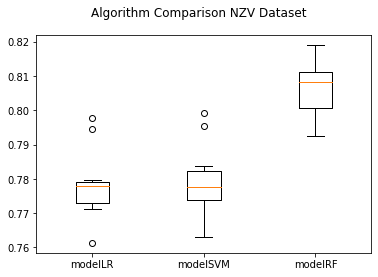

In [554]:
base_figNZV = plt.figure()
base_figNZV.suptitle('Algorithm Comparison NZV Dataset')
base_axNZV = base_figNZV.add_subplot(111)
plt.boxplot(resultsNZV)
base_axNZV.set_xticklabels(namesNZV)
plt.show()

In [ ]:
### RF TUNING

In [555]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]


In [556]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [650]:
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_randomNZV = RandomizedSearchCV(estimator = RandomForestClassifier(), param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)

In [558]:
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   39.9s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 14.0min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [559]:
rf_random.best_params_

{'n_estimators': 1600,
 'min_samples_split': 5,
 'min_samples_leaf': 1,
 'max_features': 'auto',
 'max_depth': 10,
 'bootstrap': True}

In [560]:
rf_random.best_score_

0.8192857142857143

In [582]:
RF_Pred = rf_random.predict(X_test) 

In [583]:
print(classification_report(y_test, RF_Pred)) 



              precision    recall  f1-score   support

           0       0.79      0.88      0.83      7160
           1       0.19      0.11      0.14      1840

    accuracy                           0.72      9000
   macro avg       0.49      0.49      0.49      9000
weighted avg       0.67      0.72      0.69      9000



In [653]:
max_features_range = np.arange(1,6,1)
n_estimators_range = np.arange(10,210,10)
param_grid = dict(max_features=max_features_range, n_estimators=n_estimators_range)
rf = RandomForestRegressor()
rfoob = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)
rfoobNZV = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5)

In [667]:
## RF OOB PREDICTIONS
modelRFfit = rfoob.fit(X_train, y_train)
modelRFfit.best_score_

0.20097256214322784

In [668]:
RFOOBPRED = modelRFfit.predict(X_test)

In [669]:
print(classification_report(y_test, RFOOBPRED)) 

ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [658]:
#RF NVZ Tuned Predictions  NEED TO RUN THIS LINE
rf_randomNZV.fit(X_trainNZV, y_trainNZV)



Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 16 concurrent workers.
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   41.4s
[Parallel(n_jobs=-1)]: Done 130 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 15.2min finished


RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
               

In [659]:
rfoobNZV.fit(X_trainNZV, y_trainNZV)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [660]:
RFTunedpredictions = rf_randomNZV.predict(X_testNZV)


In [661]:
print(classification_report(y_testNZV, RFTunedpredictions))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      7000
           1       0.67      0.37      0.48      2000

    accuracy                           0.82      9000
   macro avg       0.75      0.66      0.68      9000
weighted avg       0.80      0.82      0.80      9000



In [662]:
rf_randomNZV.best_score_

0.8196190476190477

In [663]:
RFNVZoobpredictions = rfoobNZV.predict(X_testNZV)

In [664]:
rfoobNZV.best_score_

0.19300753057206008

In [674]:
# save best model 
filename = 'finalmodel.sav'
dump(rf_randomNZV, open(filename, 'wb'))
# load model & print result
loaded_model = load(open(filename, 'rb'))
result = loaded_model.score(X_testNZV, y_testNZV)
print(result)

0.8192222222222222
